In [2]:
%matplotlib inline
import seaborn # import before other plotting libraries
import numpy, scipy, matplotlib.pyplot as plt, sklearn, urllib, IPython.display
import librosa, librosa.display
plt.rcParams['figure.figsize'] = (14,5)


In [7]:
tin_filepaths = ['.\\audio\\Tin\\Tin_Test (6).wav','.\\audio\\Tin\\Tin_Test (7).wav','.\\audio\\Tin\\Tin_Test (8).wav',
'.\\audio\\Tin\\Tin_Test (9).wav','.\\audio\\Tin\\Tin_Test (10).wav','.\\audio\\Tin\\Tin_Test (11).wav','.\\audio\\Tin\\Tin_Test (12).wav',
'.\\audio\\Tin\\Tin_Test (13).wav','.\\audio\\Tin\\Tin_Test (14).wav','.\\audio\\Tin\\Tin_Test (15).wav','.\\audio\\Tin\\Tin_Test (16).wav',
'.\\audio\\Tin\\Tin_Test (17).wav','.\\audio\\Tin\\Tin_Test (18).wav','.\\audio\\Tin\\Tin_Test (19).wav','.\\audio\\Tin\\Tin_Test (20).wav',
'.\\audio\\Tin\\Tin_Test (21).wav','.\\audio\\Tin\\Tin_Test (22).wav','.\\audio\\Tin\\Tin_Test (23).wav','.\\audio\\Tin\\Tin_Test (24).wav',
'.\\audio\\Tin\\Tin_Test (25).wav','.\\audio\\Tin\\Tin_Test (26).wav','.\\audio\\Tin\\Tin_Test (27).wav','.\\audio\\Tin\\Tin_Test (28).wav',
'.\\audio\\Tin\\Tin_Test (29).wav','.\\audio\\Tin\\Tin_Test (30).wav','.\\audio\\Tin\\Tin_Test (31).wav','.\\audio\\Tin\\Tin_Test (32).wav',
'.\\audio\\Tin\\Tin_Test (33).wav','.\\audio\\Tin\\Tin_Test (34).wav','.\\audio\\Tin\\Tin_Test (35).wav','.\\audio\\Tin\\Tin_Test (36).wav',
'.\\audio\\Tin\\Tin_Test (37).wav','.\\audio\\Tin\\Tin_Test (38).wav','.\\audio\\Tin\\Tin_Test (39).wav','.\\audio\\Tin\\Tin_Test (40).wav']
din_filepaths = ['.\\audio\\Din\\Din_Test (6).wav','.\\audio\\Din\\Din_Test (7).wav','.\\audio\\Din\\Din_Test (8).wav','.\\audio\\Din\\Din_Test (9).wav',
'.\\audio\\Din\\Din_Test (10).wav','.\\audio\\Din\\Din_Test (11).wav','.\\audio\\Din\\Din_Test (12).wav','.\\audio\\Din\\Din_Test (13).wav',
'.\\audio\\Din\\Din_Test (14).wav','.\\audio\\Din\\Din_Test (15).wav','.\\audio\\Din\\Din_Test (16).wav','.\\audio\\Din\\Din_Test (17).wav',
'.\\audio\\Din\\Din_Test (18).wav','.\\audio\\Din\\Din_Test (19).wav','.\\audio\\Din\\Din_Test (20).wav','.\\audio\\Din\\Din_Test (21).wav',
'.\\audio\\Din\\Din_Test (22).wav','.\\audio\\Din\\Din_Test (23).wav','.\\audio\\Din\\Din_Test (24).wav','.\\audio\\Din\\Din_Test (25).wav',
'.\\audio\\Din\\Din_Test (26).wav','.\\audio\\Din\\Din_Test (27).wav','.\\audio\\Din\\Din_Test (28).wav','.\\audio\\Din\\Din_Test (29).wav',
'.\\audio\\Din\\Din_Test (30).wav','.\\audio\\Din\\Din_Test (31).wav','.\\audio\\Din\\Din_Test (32).wav','.\\audio\\Din\\Din_Test (33).wav',
'.\\audio\\Din\\Din_Test (34).wav','.\\audio\\Din\\Din_Test (35).wav','.\\audio\\Din\\Din_Test (36).wav','.\\audio\\Din\\Din_Test (37).wav',
'.\\audio\\Din\\Din_Test (38).wav','.\\audio\\Din\\Din_Test (39).wav','.\\audio\\Din\\Din_Test (40).wav']

In [8]:
tin_signals = [
    librosa.load(p)[0] for p in tin_filepaths
]
din_signals = [
    librosa.load(p)[0] for p in din_filepaths
]

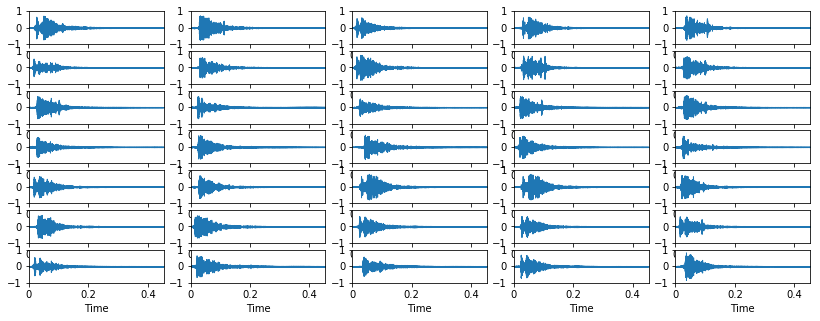

In [9]:
for i, x in enumerate(tin_signals):
    plt.subplot(7, 5, i+1)
    librosa.display.waveplot(x[:10000])
    plt.ylim(-1, 1)

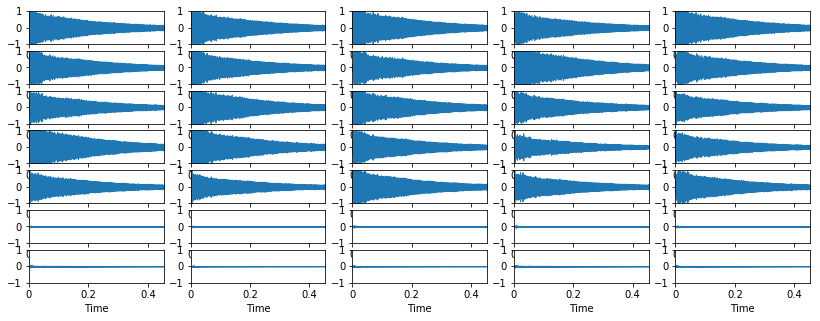

In [10]:
for i, x in enumerate(din_signals):
    plt.subplot(7, 5, i+1)
    librosa.display.waveplot(x[:10000])
    plt.ylim(-1, 1)

In [11]:
def extract_features(signal):
    return [
        librosa.feature.zero_crossing_rate(signal)[0, 0],
        librosa.feature.spectral_centroid(signal)[0, 0],
    ]

In [12]:
tin_features = numpy.array([extract_features(x) for x in tin_signals])
din_features = numpy.array([extract_features(x) for x in din_signals])

Text(0, 0.5, 'Count')

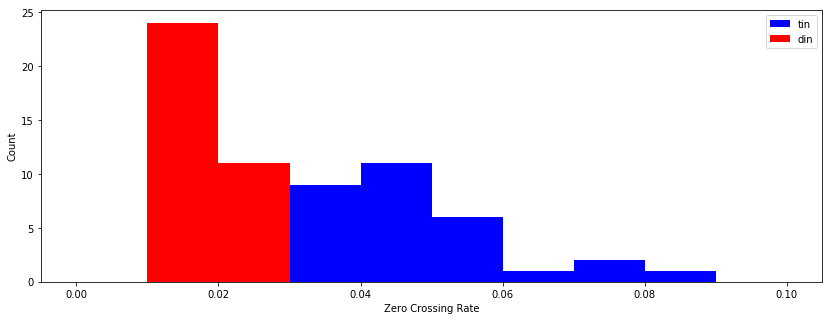

In [13]:
plt.hist(tin_features[:,0], color='b', range=(0, 0.1))
plt.hist(din_features[:,0], color='r', range=(0, 0.1))
plt.legend(('tin', 'din'))
plt.xlabel('Zero Crossing Rate')
plt.ylabel('Count')

Text(0, 0.5, 'Count')

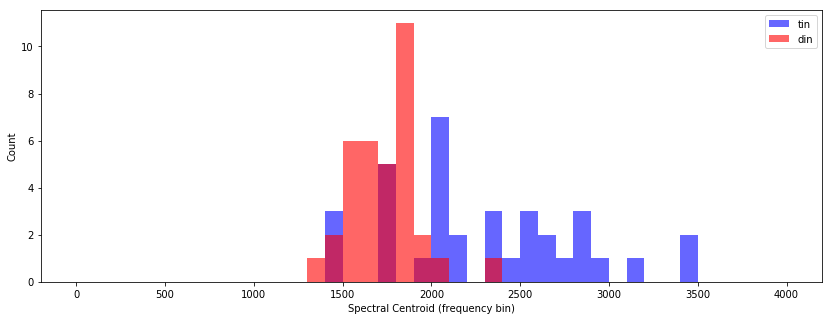

In [14]:
plt.hist(tin_features[:,1], color='b', range=(0, 4000), bins=40, alpha=0.6)
plt.hist(din_features[:,1], color='r', range=(0, 4000), bins=40, alpha=0.6)
plt.legend(('tin', 'din'))
plt.xlabel('Spectral Centroid (frequency bin)')
plt.ylabel('Count')

In [15]:
feature_table = numpy.vstack((tin_features, din_features))
print (feature_table.shape)

(70, 2)


In [16]:
scaler = sklearn.preprocessing.MinMaxScaler(feature_range=(-1, 1))
training_features = scaler.fit_transform(feature_table)
print (training_features.min(axis=0))
print (training_features.max(axis=0))

[-1. -1.]
[1. 1.]


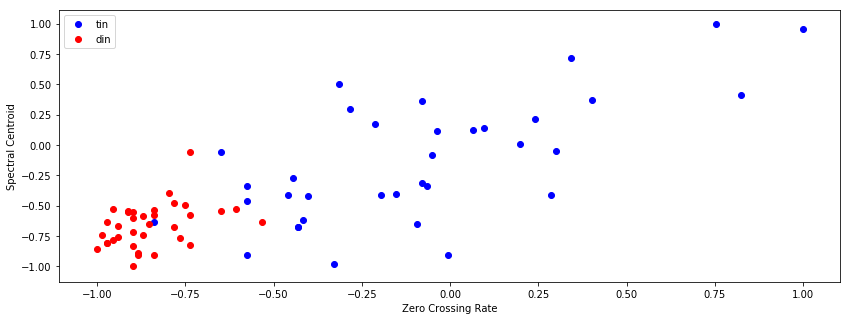

In [17]:
plt.scatter(training_features[:35,0], training_features[:35,1], c='b')
plt.scatter(training_features[35:,0], training_features[35:,1], c='r')
plt.xlabel('Zero Crossing Rate')
plt.ylabel('Spectral Centroid')
plt.legend(('tin','din'))